## Problem Statement

This retail sales dataset is created to predict the likelihood of a purchase being completed, given the customer and product features. 

<a id="lib"></a>
# Import Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
# set the plot size using 'rcParams'
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# Data Preparation

In [3]:
# load the csv file
def read_dataset (data): 
  df_sales = pd.read_csv(data)
  return df_sales
path = "retail_sales.csv"
df_sales = read_dataset(path)
df_sales.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Order Status
0,1000,53,Male,No,Smartphone,SKU1004,2,Credit Card,5538.330000,791.190000,7,20-03-2024,Standard,"Accessory,Accessory,Accessory",40.210000,Cancelled
1,1000,53,Male,No,Tablet,SKU1002,3,Paypal,741.090000,247.030000,3,20-04-2024,Overnight,Impulse Item,26.090000,Completed
2,1002,41,Male,No,Laptop,SKU1005,3,Credit Card,1855.840000,463.960000,4,17-10-2023,Express,NaN,0.000000,Completed
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Cash,3164.760000,791.190000,4,08-09-2024,Overnight,"Impulse Item,Impulse Item",60.160000,Completed
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Cash,41.500000,20.750000,2,21-05-2024,Express,Accessory,35.560000,Completed


In [4]:
# use 'shape' to check the dimension of data
def df_shape(df_sales):
    sh = df_sales.shape
    return sh 
df_shape = df_shape(df_sales)
print(df_shape)

(20000, 16)


<a id="dtype"></a>
## Check the Data Type

In [5]:
# use 'dtypes' to check the data type of a variable
# use 'shape' to check the dimension of data
def df_dtypes(df_sales):
    sh = df_sales.dtypes
    return sh 
df_dtypes = df_dtypes(df_sales)
print(df_dtypes)

Customer ID            int64
Age                    int64
Gender                object
Loyalty Member        object
Product Type          object
SKU                   object
Rating                 int64
Payment Method        object
Total Price          float64
Unit Price           float64
Quantity               int64
Purchase Date         object
Shipping Type         object
Add-ons Purchased     object
Add-on Total         float64
Order Status          object
dtype: object


<a id="drop"></a>
## Remove Insignificant Variables

In [6]:
# drop the column 'Serial No.' using drop()
def drop_columns(df_sales) : 
    cols = ['Customer ID', 'SKU','Purchase Date','Unit Price']
    df_sales = df_sales.drop(cols, axis = 1)
    return df_sales
df_sales = drop_columns(df_sales)
df_sales.head()

,Age,Gender,Loyalty Member,Product Type,Rating,Payment Method,Total Price,Quantity,Shipping Type,Add-ons Purchased,Add-on Total,Order Status
0,53,Male,No,Smartphone,2,Credit Card,5538.330000,7,Standard,"Accessory,Accessory,Accessory",40.210000,Cancelled
1,53,Male,No,Tablet,3,Paypal,741.090000,3,Overnight,Impulse Item,26.090000,Completed
2,41,Male,No,Laptop,3,Credit Card,1855.840000,4,Express,NaN,0.000000,Completed
3,41,Male,Yes,Smartphone,2,Cash,3164.760000,4,Overnight,"Impulse Item,Impulse Item",60.160000,Completed
4,75,Male,Yes,Smartphone,5,Cash,41.500000,2,Express,Accessory,35.560000,Completed


## Outlier Treatment

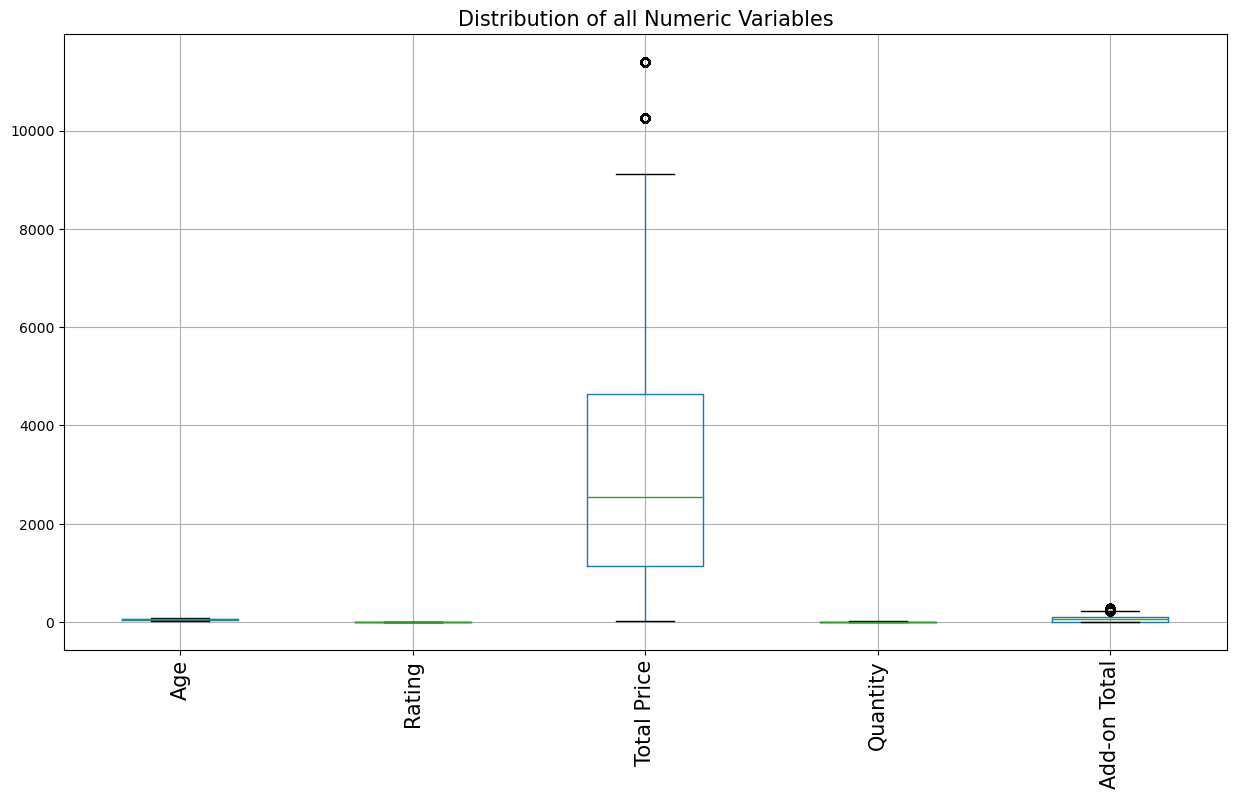

In [7]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
def outlier_treatment (df_sales) : 
    plt.figure(figsize = (15,8))

    # plot a boxplot to visualize the outliers in all the numeric variables
    df_sales.boxplot()

    # set plot label
    # set text size using 'fontsize'
    plt.title('Distribution of all Numeric Variables', fontsize = 15)

    # xticks() returns the x-axis ticks
    # 'rotation = vertical' rotates the x-axis labels vertically
    plt.xticks(rotation = 'vertical', fontsize = 15)

    # display the plot
    plt.show()

outlier_treatment (df_sales)


In [8]:
def transpose_1(df_sales): 
    df = df_sales.describe().transpose()
    return df
trans_1 = transpose_1(df_sales)
trans_1

,count,mean,std,min,25%,50%,75%,max
Age,20000.000000,48.994100,18.038745,18.000000,33.000000,49.000000,65.000000,80.000000
Rating,20000.000000,3.093950,1.223764,1.000000,2.000000,3.000000,4.000000,5.000000
Total Price,20000.000000,3180.133419,2544.978675,20.750000,1139.680000,2534.490000,4639.600000,11396.800000
Quantity,20000.000000,5.485550,2.870854,1.000000,3.000000,5.000000,8.000000,10.000000
Add-on Total,20000.000000,62.244848,58.058431,0.000000,7.615000,51.700000,93.842500,292.770000


In [9]:
# Outlier treatment function
def treat_outliers_iqr(df, columns):
    """
    Treats outliers in specified columns of a DataFrame using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names to treat outliers in.

    Returns:
        pd.DataFrame: The DataFrame with outliers treated.
    """
    df_treated = df.copy()
    for col in columns:
        Q1 = df_treated[col].quantile(0.25)
        Q3 = df_treated[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_treated[col] = np.where(df_treated[col] < lower_bound, lower_bound, df_treated[col])
        df_treated[col] = np.where(df_treated[col] > upper_bound, upper_bound, df_treated[col])
    return df_treated
columns_to_treat = df_sales.select_dtypes(include='number').columns
df_treated = treat_outliers_iqr(df_sales, columns_to_treat)
df_treated.head()

,Age,Gender,Loyalty Member,Product Type,Rating,Payment Method,Total Price,Quantity,Shipping Type,Add-ons Purchased,Add-on Total,Order Status
0,53.000000,Male,No,Smartphone,2.000000,Credit Card,5538.330000,7.000000,Standard,"Accessory,Accessory,Accessory",40.210000,Cancelled
1,53.000000,Male,No,Tablet,3.000000,Paypal,741.090000,3.000000,Overnight,Impulse Item,26.090000,Completed
2,41.000000,Male,No,Laptop,3.000000,Credit Card,1855.840000,4.000000,Express,NaN,0.000000,Completed
3,41.000000,Male,Yes,Smartphone,2.000000,Cash,3164.760000,4.000000,Overnight,"Impulse Item,Impulse Item",60.160000,Completed
4,75.000000,Male,Yes,Smartphone,5.000000,Cash,41.500000,2.000000,Express,Accessory,35.560000,Completed


In [10]:
def transpose_2(df_treated): 
    df = df_sales.describe().transpose()
    return df
trans_2 = transpose_2(df_sales)
trans_2

,count,mean,std,min,25%,50%,75%,max
Age,20000.000000,48.994100,18.038745,18.000000,33.000000,49.000000,65.000000,80.000000
Rating,20000.000000,3.093950,1.223764,1.000000,2.000000,3.000000,4.000000,5.000000
Total Price,20000.000000,3180.133419,2544.978675,20.750000,1139.680000,2534.490000,4639.600000,11396.800000
Quantity,20000.000000,5.485550,2.870854,1.000000,3.000000,5.000000,8.000000,10.000000
Add-on Total,20000.000000,62.244848,58.058431,0.000000,7.615000,51.700000,93.842500,292.770000


## Missing Value Treatment

In [11]:
def missing_value (df_treated):
    df_treated = df_treated.isnull().sum().sort_values(ascending=False) 
    #df_treated_1 = df_treated.dropna(subset=['Gender'])
    #df_treated_1 = df_treated_1.isnull().sum().sort_values(ascending=False) 
    return df_treated

missing_value (df_treated)
#Percent = (df_treated.isnull().sum()*100/df_treated.isnull().count()).sort_values(ascending=False)  

Add-ons Purchased    4868
Gender                  1
Age                     0
Loyalty Member          0
Product Type            0
Rating                  0
Payment Method          0
Total Price             0
Quantity                0
Shipping Type           0
Add-on Total            0
Order Status            0
dtype: int64

In [16]:
#Removing missing value row by Gender 
def remove_value(df_treated):
    df_treated_1 = df_treated.dropna(subset=['Gender'])
    df = df_treated_1.isnull().sum().sort_values(ascending=False)   
    return df
remove_value(df_treated)

Add-ons Purchased    4867
Age                     0
Gender                  0
Loyalty Member          0
Product Type            0
Rating                  0
Payment Method          0
Total Price             0
Quantity                0
Shipping Type           0
Add-on Total            0
Order Status            0
dtype: int64

## Corelation heatmap for numeric variables

In [14]:
df_treated_1 = missing_value(df_treated)[1]
corr_matrix = df_treated_1.select_dtypes(include='number').corr()

AttributeError: 'numpy.int64' object has no attribute 'select_dtypes'

In [ ]:
 sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
 plt.show()

In [ ]:
## Target Variable - convert to numeric

In [ ]:
df_treated_1['Order Status'] = df_treated_1['Order Status'].apply(lambda x: 1 if x == 'Completed' else 0 if x == 'Cancelled' else None)

In [ ]:
df_treated_1['Add-ons Purchased'] = df_treated_1['Add-ons Purchased'].apply(lambda x: 0 if x == np.nan else 1 )

In [ ]:
print(df_treated_1['Order Status'].value_counts())

print(df_treated_1['Order Status'].value_counts(normalize = True))

In [ ]:
## Dividing data into train and test

In [ ]:
df_treated_1.drop('Order Status', axis=1).columns

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_treated_1.drop('Order Status', axis=1)
y = df_treated_1['Order Status']

# Perform the stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025, stratify=y)


In [ ]:
X_train.head()

## Label Encoding,One hot encoding and scaling


In [ ]:
X_train.columns

In [ ]:
df_encoded = pd.get_dummies(X_train, columns=['Gender', 'Loyalty Member', 'Product Type','Payment Method','Shipping Type'], drop_first=True)

In [ ]:
df_encoded = pd.get_dummies(df_encoded).astype(int)

In [ ]:
df_encoded_1 = pd.get_dummies(X_test, columns=['Gender', 'Loyalty Member', 'Product Type','Payment Method','Shipping Type'], drop_first=True)

In [ ]:
df_encoded_1 = pd.get_dummies(df_encoded_1).astype(int)

In [ ]:
print(df_encoded.head())

In [ ]:
# List of numerical columns to scale
num_cols = ['Age', 'Rating', 'Total Price', 'Quantity', 'Add-on Total']

# Initialize and fit scaler only on training data
scaler = StandardScaler()
scaler.fit(df_encoded[num_cols])

# Transform both training and test data
X_train_scaled = scaler.transform(df_encoded[num_cols])
X_test_scaled = scaler.transform(df_encoded_1[num_cols])

# Replace the scaled columns in the original DataFrames
X_scaled_train = df_encoded.copy()
X_scaled_train[num_cols] = X_train_scaled

X_scaled_test = df_encoded_1.copy()
X_scaled_test[num_cols] = X_test_scaled

# Display head
print(X_scaled_train.head())
print(X_scaled_test.head())

In [ ]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_scaled_train).fit()

# print the summary of the model
print(logreg.summary())

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# instantiate the 'GradientBoostingClassifier' 
# n_estimators: number of estimators to consider
# 'max_depth': assigns maximum depth of the tree
# pass the 'random_state' to obtain the same results for each code implementation
gboost_model = GradientBoostingClassifier(n_estimators = 100, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost=gboost_model.fit(X_scaled_train, y_train)

In [ ]:
pred = gboost_model.predict(X_scaled_test)
pred


In [ ]:
np.set_printoptions(suppress=True) 
pred_proba = gboost_model.predict_proba(X_scaled_test)
pred_proba

In [ ]:
T1 = pd.DataFrame({'Actuals':y_test,'Predicted':pred_proba[:, 1]})

T1['Decile'] = pd.qcut(T1['Predicted'], 10, labels=False)



print(T1)

In [ ]:
pip install pandasql

In [ ]:
from pandasql import sqldf
query = """ Select decile,count(Actuals) , sum(Actuals) as Events, max(Predicted)as max_prob, min(Predicted) as min_Prob from T1 group by decile order by decile desc"""
gains = sqldf(query)

gains

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have a trained model, test features, and true labels
ConfusionMatrixDisplay.from_estimator(
    gboost_model,
    X_scaled_test,
    y_test,
    cmap='Blues',
    normalize=None  # or 'true', 'pred', or 'all'
)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming gboost_model is trained and you have predictions:
y_pred = gboost_model.predict(X_scaled_test)

# Print the classification report
print(classification_report(y_test, y_pred))

In [ ]:
important_features = pd.DataFrame({'Features': X_scaled_train.columns, 
                                   'Importance': gboost_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)
print(important_features)


In [ ]:
sns.boxplot(x='Order Status', y='Age', data=df_treated_1)
plt.title("Box Plot of Order Status v Age")
plt.show()

In [ ]:
sns.boxplot(x='Order Status', y='Add-on Total', data=df_treated_1)
plt.title("Box Plot of Order Status v Age")
plt.show()

In [ ]:
sns.boxplot(x='Order Status', y='Total Price', data=df_treated_1)
plt.title("Box Plot of Order Status v Age")
plt.show()

In [ ]:
sns.boxplot(x='Order Status', y='Quantity', data=df_treated_1)
plt.title("Box Plot of Order Status v Age")
plt.show()

In [ ]:
sns.boxplot(x='Order Status', y='Rating', data=df_treated_1)
plt.title("Box Plot of Order Status v Age")
plt.show()